# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей.

Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

1. Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
2. Контролировать добросовестность кассиров при продаже алкоголя.

Требуется постройть модель, которая по фотографии определит приблизительный возраст человека. В качестве метрки качества выбрана средняя абсолютная ошибка, значении которой должно быть меньше 8. 

В распоряжении набор фотографий людей с указанием возраста - датасет "Appa-Real".

# Исследовательский анализ данных

Датасет "Appa-Real" - это набор изображений лиц, сопровождающихся метками возраста. Каждое изображение было собрано из сети Интернет с помощью гугл-поиска и оценено людьми на предмет правдоподобности и точности метки возраста.

В датасете содержится более 7 тысяч изображений, с возрастом, представленным в виде целочисленного значения. Датасет предназначен для использования в задачах компьютерного зрения, связанных с оценкой возраста и классификацией лиц по возрастным категориям.

Проведение исследовательского анализа данных для признака возраста в датасете "Appa-Real" может разрешить следующие вопросы:

1. Распределение возраста в датасете может быть скошенным вправо. Это может быть связано с тем, что люди старше определенного возраста менее вероятны для поиска в Интернете;
2. Средний возраст в датасете может быть выше или ниже ожидаемого, и может зависеть от источника данных, в котором были собраны изображения;
3. Медианное значение возраста в датасете может быть ниже или выше среднего, что может указывать на смещение распределения возраста;
4. Диапазон возраста может быть достаточно широким, что может означать, что данные могут быть использованы для обучения модели на разных возрастных категориях;
5. Возможны выбросы в возрасте, которые могут указывать на ошибки в разметке данных, а также на несоответствие изображения и возраста.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
labels = pd.read_csv('/datasets/faces/labels.csv')
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


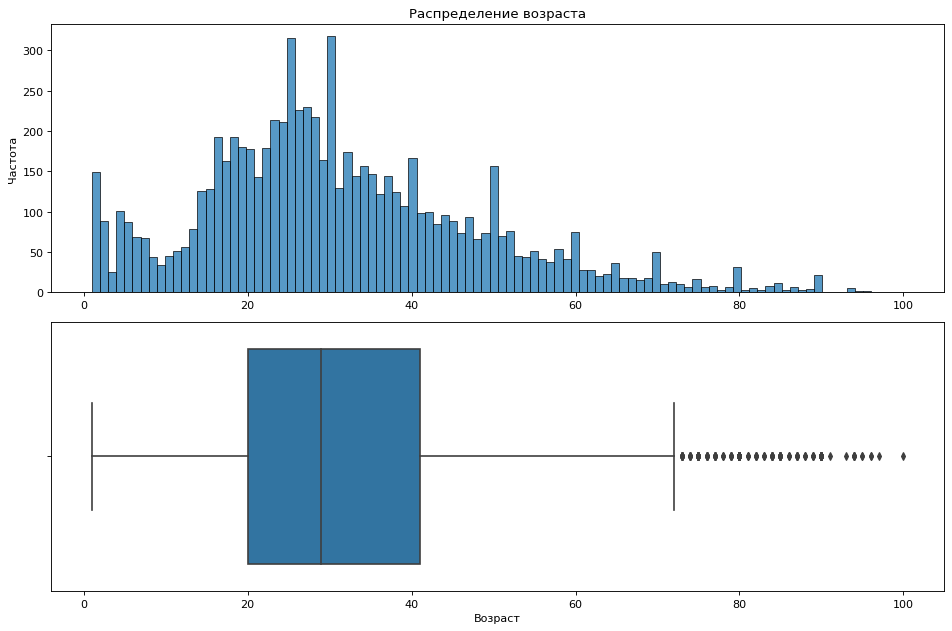

In [ ]:
print(labels['real_age'].describe())

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), dpi=80)

sns.histplot(labels['real_age'], bins=100, ax=axs[0])
axs[0].set_title('Распределение возраста')
axs[0].set_xlabel('')
axs[0].set_ylabel('Частота')

sns.boxplot(x=labels['real_age'], ax=axs[1])
axs[1].set_xlabel('Возраст')

plt.tight_layout()
plt.show()

**Вывод**

Для признака возраста в датасете "Appa-Real" можно сделать следующие выводы по статистикам:

1. Количество наблюдений - 7591, что говорит о том, что в датасете достаточно много данных.
2. Средний возраст - 31.2 лет, что означает, что в целом люди, чьи изображения содержатся в датасете, моложе 40 лет.
3. Стандартное отклонение - 17.1 лет, что говорит о том, что возраст людей в датасете достаточно разнообразен.
4. Минимальный возраст - 1 год, что означает, что в датасете присутствуют изображения детей.
5. 25-й перцентиль - 20 лет, что говорит о том, что 25% людей в датасете моложе 20 лет.
6. Медиана - 29 лет, что означает, что 50% людей в датасете моложе 29 лет.
7. 75-й перцентиль - 41 год, что говорит о том, что 75% людей в датасете моложе 41 года.
8. Максимальный возраст - 100 лет, что означает, что в датасете присутствуют достоточно пожилые люди.
9. Пики в юбилейные годы жизни могут быть обусловлены округлением возраста при разметке даных.

Исходя из этих статистик можно сделать вывод, что возраст людей в датасете разнообразен и охватывает широкий диапазон от 1 года до 100 лет. Большинство людей в датасете моложе 40 лет.

Визуальное изучение выборки изображений в датасете "Appa-Real" может разрешить следующие вопросы:

1. Помочь понять, как выглядят изображения в датасете и как они могут отличаться друг от друга по форме, цвету, освещению и т.д.
2. Количество и качество изображений в датасете может быть важным фактором при обучении модели. Например, если изображения в датасете сильно зашумлены или имеют низкое качество, это может негативно повлиять на точность и производительность модели;
3. Распределение возрастов на изображениях может также иметь значение при обучении модели. Если изображения в датасете имеют смещенное распределение возрастов, это может привести к проблемам с обучением модели, особенно если мы хотим обучить ее распознавать возраст внутри определенного диапазона (связь с исследованием потребителького поведения);
4. Также, вывод изображений может помочь определить, какие преобразования или улучшения изображений могут быть необходимы для повышения качества обучения модели. Например, мы можем заметить, что некоторые изображения имеют слишком низкий контраст или яркость, и мы можем применить соответствующие фильтры или преобразования для улучшения качества изображений перед их обработкой моделью.

Found 7591 validated image filenames.


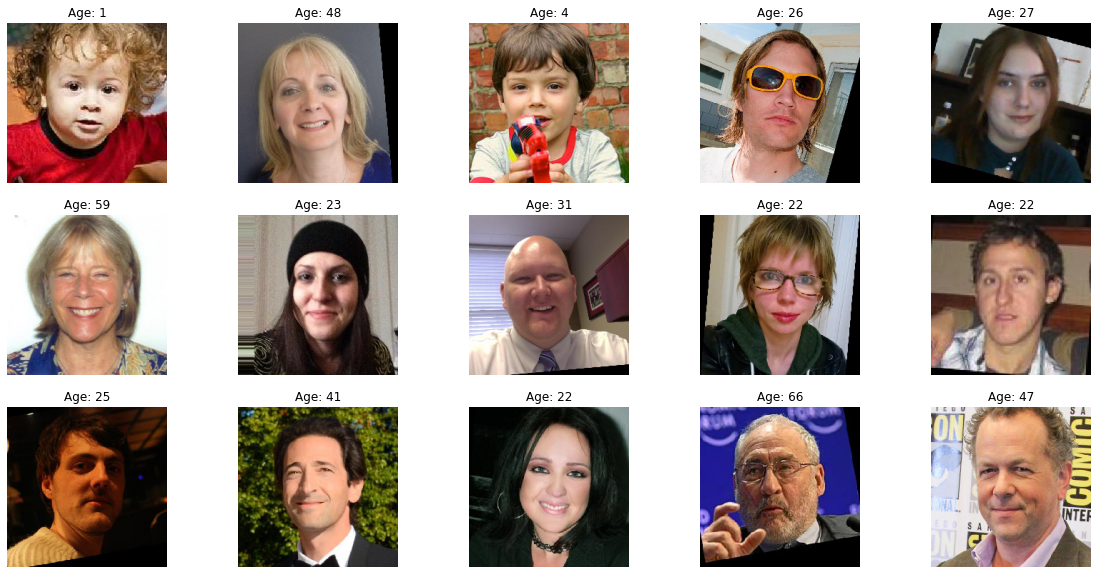

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

img_gen = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    seed=42,
    shuffle=True
)

num_images = 15

plt.figure(figsize=(20,10))

for i in range(num_images):
    plt.subplot(3, 5, i+1)
    X_batch, y_batch = next(img_gen)
    image = X_batch[0]
    plt.imshow(image)
    plt.title('Age: ' + str(y_batch[0]))
    plt.axis('off')
    
plt.show()

Реализация следующая:

1. Используем CSV-файл labels с метками возраста;
2. Затем мы настраиваем объект ImageDataGenerator, который будет использоваться для генерации изображений. В данном случае мы только масштабируем значения пикселей на интервал от 0 до 1;
3. Создаем генератор изображений с помощью метода flow_from_dataframe(), указывая путь к директории с изображениями, размер изображений, размер батча и другие параметры. В этом примере мы используем режим 'raw', который означает, что метки не будут преобразованы в one-hot кодировку;
4. И, наконец, мы отображаем 15 изображений, выбранных случайным образом из датасета, используя метод next() для получения очередного батча изображений и меток. Далее мы извлекаем первое изображение и его метку из батча и отображаем на экране с помощью библиотеки matplotlib.

**Вывод**

Выборка из 15-ти случаных изображений подтверждает вывод статистического анализа - возраст людей в датасете разнообразен и охватывает широкий диапазон - данные могут быть использованы для обучения модели на разных возрастных категориях.

Так, 

1. Изображения в датасете представляют как мужчин, так и женщин разных возрастов;
2. Датасет содержит информацию о возрасте людей на изображении;
3. Распределение возрастов в датасете является неравномерным, с более частым представлением людей в возрасте от 20 до 50 лет;
4. Изображения имеют разные особенности, такие как цвет кожи, прически, наличие головных уборов, очков и т.д.

Кроме того, датасет может быть использован для задач машинного обучения, связанных с распознаванием пола на изображении, а также для других задач, таких как распознавание эмоций и др.

Дополнительный анализ данных может включать изучение распределения цветовой палитры изображений, исследование формата и разрешения изображений, а также другие свойства, связанные с конкретной задачей.

# Обучение модели

```python

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import pandas as pd

def load_train(path):
  
  train_datagen = ImageDataGenerator(validation_split=0.25, 
                                     rescale=1/255.,
                                     horizontal_flip=True)
  
  train_datagen_flow = train_datagen.flow_from_dataframe(
      dataframe=pd.read_csv(path+'/labels.csv'),
      directory=path+'/final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='other',
      subset='training',
      seed=42)

  return train_datagen_flow

def load_test(path):
  
  validation_datagen = ImageDataGenerator(validation_split=0.25, 
                                          rescale=1/255.)
  
  val_datagen_flow = validation_datagen.flow_from_dataframe(
      dataframe=pd.read_csv(path+'/labels.csv'),
      directory=path+'/final_files/',
      x_col='file_name',
      y_col='real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='other',
      subset='validation',
      seed=42)

  return val_datagen_flow

def create_model(input_shape):

    backbone = ResNet50(input_shape=(224, 224, 3),
                        weights='imagenet', 
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalMaxPooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, 
                batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
      steps_per_epoch = len(train_data)
    
    if validation_steps is None:
      validation_steps = len(test_data)
 
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

```

```

Found 5694 validated image filenames.
Found 1897 validated image filenames.

Train for 178 steps, validate for 60 steps
Epoch 1/10
178/178 - 48s - loss: 192.4293 - mae: 10.4978 - val_loss: 712.8452 - val_mae: 21.6642
Epoch 2/10
178/178 - 47s - loss: 90.5690 - mae: 7.2256 - val_loss: 560.4014 - val_mae: 18.4641
Epoch 3/10
178/178 - 53s - loss: 64.0776 - mae: 6.0493 - val_loss: 340.1574 - val_mae: 13.4979
Epoch 4/10
178/178 - 46s - loss: 53.3337 - mae: 5.5307 - val_loss: 169.5030 - val_mae: 9.7219
Epoch 5/10
178/178 - 45s - loss: 46.0690 - mae: 5.1303 - val_loss: 93.7360 - val_mae: 7.3150
Epoch 6/10
178/178 - 50s - loss: 40.4925 - mae: 4.8502 - val_loss: 91.6622 - val_mae: 7.2734
Epoch 7/10
178/178 - 45s - loss: 37.0694 - mae: 4.6098 - val_loss: 74.9077 - val_mae: 6.4656
Epoch 8/10
178/178 - 62s - loss: 34.9480 - mae: 4.4466 - val_loss: 77.2177 - val_mae: 6.5614
Epoch 9/10
178/178 - 65s - loss: 33.3295 - mae: 4.3640 - val_loss: 74.4815 - val_mae: 6.3460
Epoch 10/10
178/178 - 60s - loss: 31.5074 - mae: 4.2447 - val_loss: 76.6355 - val_mae: 6.5296

60/60 - 11s - loss: 76.6355 - mae: 6.5296
Test MAE: 6.5296

```

# Анализ обученной модели


Итак, код реализует обучение нейронной сети на датасете, состоящем из изображений лиц людей и их возрастов. Основные шаги обучения заключаются в загрузке и подготовке данных, создании модели, обучении модели на тренировочном датасете и оценке качества модели на валидационном датасете.

Загрузка и подготовка данных:

Код используют объект ImageDataGenerator, чтобы загрузить и аугментировать изображения из директории, указанной в переменной path.
Датасет разделен на тренировочный и валидационный поднаборы в соотношении 3:1 при помощи параметра validation_split.
Для аугментации изображений используется повороты на 90 градусов по горизонтали.
Изображения масштабируются при помощи rescale=1/255.

Создание модели:

Используется предобученная на ImageNet модель ResNet50 в качестве основы для модели.
Указывается размер входных изображений input_shape=(224, 224, 3).
Добавляется один полносвязный слой, и выходной слой с одним выходом.
Для уменьшения риска переобучения добавляется слой dropout с коэффициентом 0.3.

Обучение модели:

Код использует метод fit() для обучения модели на тренировочном датасете и оценки ее качества на валидационном датасете.
В качестве оптимизатора используется Adam с learning rate 0.0001.
В качестве функции потерь используется среднеквадратическая ошибка, а в качестве метрики - средняя абсолютная ошибка.

Таким образом, архитектура модели заключается в использовании предобученной на ImageNet модели ResNet50 для извлечения признаков из изображений лиц. Затем полученные признаки передаются в полносвязный слой, который совместно с выходным слоем позволяют модели решить задачу регресии - определить возраст человека.

В модели используется функция активации ReLU для скрытого слоев и выходного слоя по следущим соображениям:

Простота: Функция ReLU очень проста и легко реализуется. Ее вычисление требует всего лишь одной операции - установить все отрицательные значения в 0.

Вычислительная эффективность: Функция ReLU имеет вычислительную эффективность. Поскольку большинство элементов входных данных, передаваемых через слой, будут положительными, многие операции умножения на 0 могут быть пропущены.

Нелинейность: ReLU обеспечивает нелинейность в модели, что позволяет модели более эффективно справляться с задачами, которые требуют нелинейных преобразований входных данных.

Способность предотвращать затухание градиента: Функция ReLU может предотвратить проблему затухания градиента, которая может возникнуть при использовании других функций активации, таких как сигмоида или тангенс гиперболический.

В целом, функция активации ReLU является простой, вычислительно эффективной, обеспечивает нелинейность и предотвращает затухание градиента, что делает ее очень хорошим выбором для многих нейронных сетей.

GlobalMaxPooling2D используется для уменьшения размерности тензора признаков перед подачей его на выходной слой. Этот слой извлекает максимальное значение по каждому признаку из всего изображения и создает из них вектор фиксированной длины. Таким образом, вместо того чтобы использовать обычный пулинг, который может усреднять значения признаков, GlobalMaxPooling2D извлекает только самые значимые признаки из всего изображения. Это позволяет уменьшить количество параметров модели, сохраняя важные признаки изображения.

Модель была обучена на 178 эпохах. В результате получили среднюю абсолютную ошибку на тестовых данных равный 6.5296, что позволяет решить поставленную задачу с приемлемой метрикой качества.